In [3]:
# Import Modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Import Data
df = pd.read_csv("../data/13222067_cleaned.csv")
df.head()

,jenis_kelamin,usia,pendidikan,pekerjaan,penghasilan,domisili,durasi_internet,aktivitas_online_meningkat,aktivitas_online_meningkat_3bln,layanan_aktif_1,...,bayar_online_5,bayar_online_6,bayar_online_7,bayar_online_8,keluhan_online_1,keluhan_online_2,keluhan_online_3,keluhan_online_4,keluhan_online_5,keluhan_online_6
0,Pria,47,SMA,"Pekerja serabutan (jaga kos, antar aqua galon,...",Rp 2 juta – Rp 5 juta,bandung,3.0,Sama saja,NaN,Mobile Banking,...,NaN,NaN,Melalui minimarket,NaN,Barang yang diperoleh tidak sesuai dengan spes...,Barang rusak/ salah tetapi tidak dapat dikemba...,NaN,NaN,NaN,NaN
1,Wanita,19,SMA,Pelajar / Mahasiswa,< Rp 2 juta,surabaya,10.0,Ya,Keperluan mengerjakan tugas,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Pria,50,S1,Karyawan Swasta,Rp 5 juta – Rp 10 juta,jakarta,6.0,Ya,Melakukan video conference,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Wanita,19,SMA,Pelajar / Mahasiswa,< Rp 2 juta,bandung,5.0,Ya,Mengikuti kelas online,Mobile Banking,...,NaN,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,Barang rusak/ salah tetapi tidak dapat dikemba...,NaN,NaN,NaN,NaN
4,Pria,28,S1,Karyawan Swasta,Rp 5 juta – Rp 10 juta,bandung,9.0,Sama saja,NaN,Mobile Banking,...,Transfer via ATM,NaN,NaN,NaN,NaN,NaN,Pembayaran sudah dilakukan; barang tidak tersedia,NaN,Pembayaran telah dilakukan tetapi tidak terdet...,NaN


## DEMOGRAFI

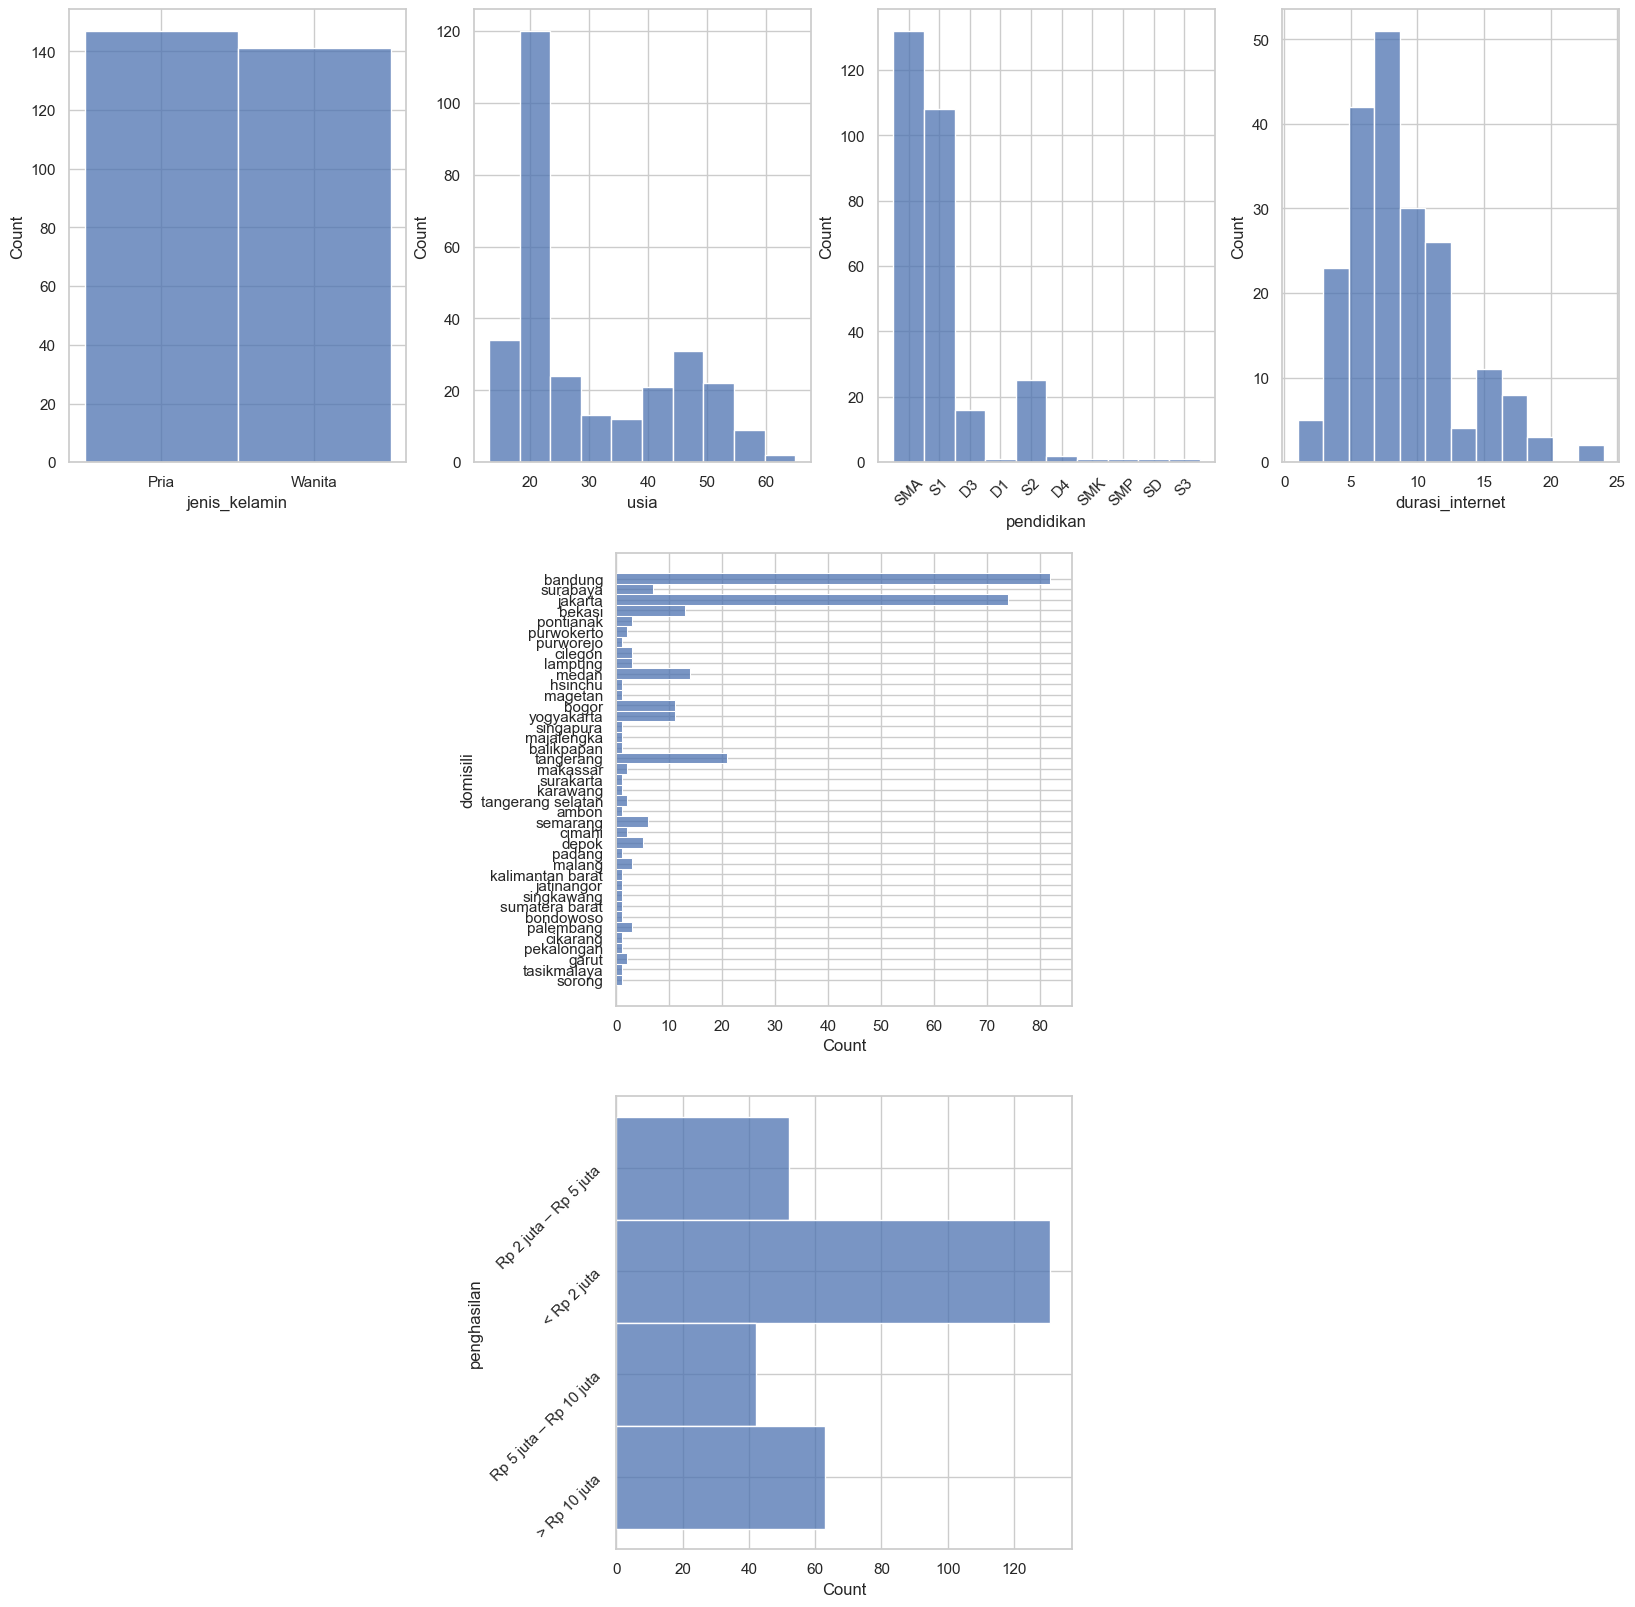

In [5]:
sns.set(style="whitegrid")
# fig, axs = plt.subplots(3,3,figsize=(15,15))
plt.figure(figsize=(20,20))
subplotSize = [[3,4,1], [3,4,2], [3,4,3], [3,4,4], [3,3,5], [3,3,8]]
axes = []
for i in range(len(subplotSize)):
    axes.append(plt.subplot(subplotSize[i][0], subplotSize[i][1], subplotSize[i][2]))

sns.histplot(data=df, x="jenis_kelamin", ax=axes[0])
sns.histplot(data=df, x="usia", ax=axes[1])
sns.histplot(data=df, x="pendidikan", ax=axes[2]).tick_params(axis='x', rotation=45)
sns.histplot(data=df, x="durasi_internet", ax=axes[3])

# sns.histplot(data=df, x="pekerjaan", kde=True, ax=axs[1,1])
sns.histplot(data=df, y="domisili", ax=axes[4])
sns.histplot(data=df, y="penghasilan", ax=axes[5]).tick_params(axis='y', rotation=45)

In [80]:
def create_graph_checkbox(filepath, df, column_list, title="", xlabel="", ylabel=""):
    value_counts = {}
    for col in column_list:
        value_count = df[col].value_counts(dropna=True) 
        key = value_count.keys().tolist()[0]
        val = value_count.tolist()[0]
        value_counts[key] = val
    value_counts_series = pd.Series(value_counts)
    plt = sns.barplot(x=value_counts_series.index, y=value_counts_series.values)
    plt.set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.tick_params(rotation=45)
    plt.figure.savefig(filepath, bbox_inches="tight")
    plt.figure.clf()
def create_graph_distribution(filepath, df, column, title="", xlabel="", ylabel=""):
    value_count = df[column].value_counts()
    plt = sns.barplot(x=value_count.index, y=value_count.values)
    plt.set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.tick_params(rotation=45)
    plt.figure.savefig(filepath, bbox_inches="tight")
    plt.figure.clf()



In [83]:
layanan_aktif_cols = ["layanan_aktif_1", "layanan_aktif_2", "layanan_aktif_3", "layanan_aktif_4", "layanan_aktif_5", "layanan_aktif_6"]
bank_cols = ["bank_1", "bank_2", "bank_3", "bank_4", "bank_5", "bank_6", "bank_7"]
# freq_bank_cols = ["freq_atm", "freq_internet_bank", "freq_mobile_bank", "freq_sms_bank", "freq_cabang"]
fitur_disukai_cols = ["fitur_cekSaldo", "fitur_mutasi", "fitur_transfer_sesamabank", "fitur_transfer_antarbank", "fitur_pulsa", "fitur_tagihan"]
keluhan_cols = ["keluhan_1", "keluhan_2", "keluhan3", "keluhan 4"]

emoney_pilihan_cols = ["emoney_pilihan1", "emoney_pilihan2", "emoney_pilihan3", "emoney_pilihan4", "emoney_pilihan5", "emoney_pilihan6"
        , "emoney_pilihan7", "emoney_pilihan8", "emoney_pilihan9", "emoney_pilihan10", "emoney_pilihan11"]
alasan_emoney_cols = ["alasan_emoney_1", "alasan_emoney_2", "alasan_emoney_3", "alasan_emoney_4", "alasan_money_5"]
penggunaan_emoney_cols = ["penggunaan_emoney_1", "penggunaan_emoney_2", "penggunaan_emoney_3", "penggunaan_emoney_4", "penggunaan_emoney_5"
        , "penggunaan_emoney_6", "penggunaan_emoney_7", "penggunaan_emoney_8", "penggunaan_emoney_9", "penggunaan_emoney_10"]
cara_topup_cols = ["cara_topup_emoney_1", "cara_topup_emoney_2", "cara_topup_emoney_3", "cara_topup_emoney_4", "cara_topup_emoney_5", "cara_topup_emoney_6", "cara_topup_emoney_7"]
keluhan_emoney_cols = ["keluhan_emoney_1", "keluhan_emoney_2", "keluhan_emoney_3", "keluhan_emoney_4"]
penggunaan_qr_cols = ["penggunaan_qr_1", "penggunaan_qr_2", "penggunaan_qr_3", "penggunaan_qr_4"]
lokasi_qr_cols = ["lokasi_qr_1", "lokasi_qr_2", "lokasi_qr_3", "lokasi_qr_4", "lokasi_qr_5", "lokasi_qr_6"]

belanja_online_meningkat_cols = ["belanja_online_1", "belanja_online_2", "belanja_online_3", "belanja_online_4", "belanja_online_5"
        , "belanja_online_6", "belanja_online_7", "belanja_online_8", "belanja_online_9", "belanja_online_10"]
belanja_barang_cols = ["belanja_fashion", "belanja_groceries", "belanja_hp", "belanja_laptop", "belanja_elektronik"
        , "belanja_kosmetik", "belanja_hobi", "belanja_pulsa", "belanja_makanan", "belanja_pesawat", "belanja_bioskop"]
tempat_belanja_online_cols = ["tempat_belanja_online_1", "tempat_belanja_online_2", "tempat_belanja_online_3", "tempat_belanja_online_4"
        , "tempat_belanja_online_5", "tempat_belanja_online_6", "tempat_belanja_online_7", "tempat_belanja_online_8"]
ecommerce_cols = ["ecommerce_1", "ecommerce_2", "ecommerce_3", "ecommerce_4", "ecommerce_5", "ecommerce_6"
        , "ecommerce_7", "ecommerce_8", "ecommerce_9", "ecommerce_10", "ecommerce_11", "ecommerce_12"]
alasan_belanja_offline_cols = ["alasan_offline_1", "alasan_offline_2", "alasan_offline_3", "alasan_offline_4", "alasan_offline_5", "alasan_offline_6", "alasan_offline_7"]
cara_bayar_online_cols = ["bayar_online_1", "bayar_online_2", "bayar_online_3", "bayar_online_4", "bayar_online_5", "bayar_online_6", "bayar_online_7", "bayar_online_8"]
keluhan_online_cols = ["keluhan_online_1", "keluhan_online_2", "keluhan_online_3", "keluhan_online_4", "keluhan_online_5", "keluhan_online_6"]


create_graph_checkbox("../output/distribusi_layanan_Aktif.png", df, layanan_aktif_cols, "Distribusi Layanan Aktif", "Layanan Aktif", "Jumlah")
create_graph_checkbox("../output/distribusi_bank.png", df, bank_cols, "Distribusi Bank", "Bank", "Jumlah")

for col in fitur_disukai_cols:
        create_graph_distribution("../output/" + col + ".png", df, col, "Distribusi " + col, "Fitur", "Jumlah")


<Figure size 640x480 with 0 Axes>